In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [54]:
np.random.seed(100)
p = np.array([5, 10, 15]) # polynomial degrees
n = 100 # number of data points
lmbdas = np.array([.0001, .001, .01, .1, 1])

# Make data set.
np.random.seed(100)
x = np.linspace(-3, 3, n)#.reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1)

In [8]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [28]:
nlmbdas = len(lmbdas)
MSEtrain = np.zeros(nlmbdas)
MSEtest = np.zeros(nlmbdas)

for i, deg in enumerate(p):
    I = np.eye(deg, deg) 
    X = np.zeros((len(x), deg))
    X[:,0] = 1.0
    X[:,1] = x
    X[:,2] = x**2
    X[:,3] = x**3
    X[:,4] = x**4
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    Ridgebeta = np.linalg.pinv(X_train.T @ X_train + deg*I) @ X_train.T @ y_train
    ytildeRidge = X_train @ Ridgebeta
    ypredictRidge = X_test @ Ridgebeta
    MSEtrain[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)


print(f'MSE (train): {MSEtrain}')
print(f'MSE (test): {MSEtest}')

MSE (train): [0.0258384  0.03421051 0.04537938 0.         0.        ]
MSE (test): [0.02139116 0.05508636 0.0444499  0.         0.        ]


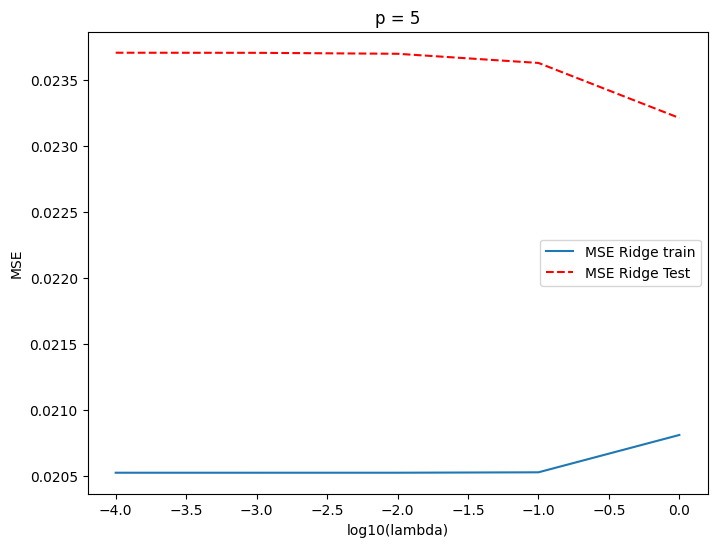

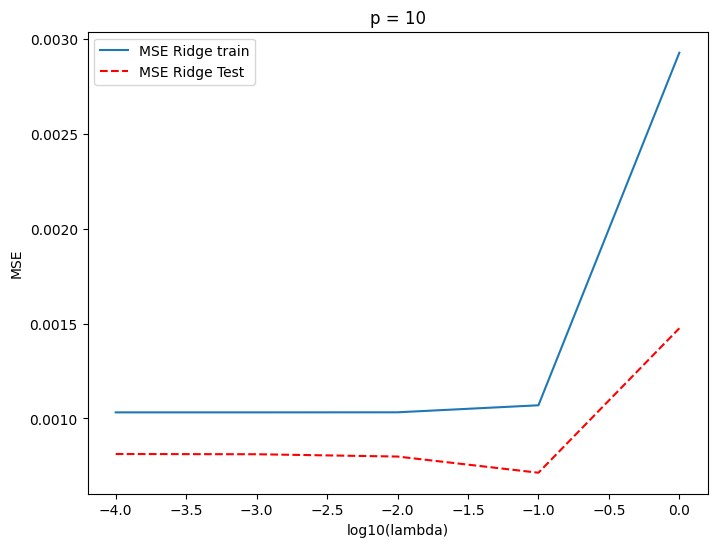

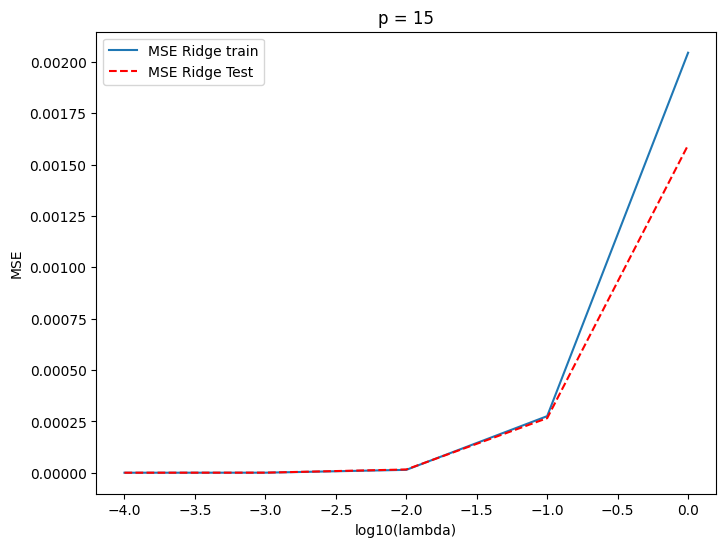

In [57]:

def ridge_regression(p, plot = False):
    I = np.eye(p, p)
    X = np.zeros((len(x), p))
    X[:,0] = 1.0
    for i in range(1, p):
        X[:, i] = x**(i)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    lmbdas = [.0001, .001, .01, .1, 1]
    MSEPredict = np.zeros(len(lmbdas))
    MSETrain = np.zeros(len(lmbdas))
    MSELassoPredict = np.zeros(len(lmbdas))
    MSELassoTrain = np.zeros(len(lmbdas))

    for i, lmbda in enumerate(lmbdas):
        Ridgebeta = np.linalg.inv(X_train.T @ X_train+lmbda*I) @ X_train.T @ y_train

        ytildeRidge = X_train @ Ridgebeta
        ypredictRidge = X_test @ Ridgebeta
        MSEPredict[i] = MSE(y_test,ypredictRidge)
        MSETrain[i] = MSE(y_train,ytildeRidge)
    
    if plot:
        plt.figure(figsize = (8, 6))
        plt.title(f'p = {p}')
        plt.plot(np.log10(lmbdas), MSETrain, label = 'MSE Ridge train')
        plt.plot(np.log10(lmbdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
        plt.xlabel('log10(lambda)')
        plt.ylabel('MSE')
        plt.legend()

ridge_regression(5, plot = True)
ridge_regression(10, plot = True)
ridge_regression(15, plot = True)
plt.show()